In [1]:
import glob,os
import librosa as rs
import numpy as np
import matplotlib.pyplot as plt   

## n_fft = 512, hop = 128, center = False

In [88]:
input_wav = rs.load("../data/male_1.wav",sr=16000)[0]
cpp_stft = np.fromfile("../data/male_1_stft.bin", dtype=np.float64)
print(cpp_stft.shape)
cpp_stft = cpp_stft.reshape((int(len(cpp_stft)/514), 514))
# r,i,r,i  to cplx cplx
cpp_stft = cpp_stft[:,0::2] + cpp_stft[:,1::2]*1j
cpp_stft = cpp_stft.T
cpp_stft = cpp_stft[:,7:-1]
print(cpp_stft.shape)

rs_stft = rs.stft(input_wav,n_fft=512,hop_length=128,center=False)
rs_stft = rs_stft[:,4:]
print(rs_stft.shape)



(149060,)
(257, 282)
(257, 282)


(282,)


Text(0.5, 1.0, 'difference')

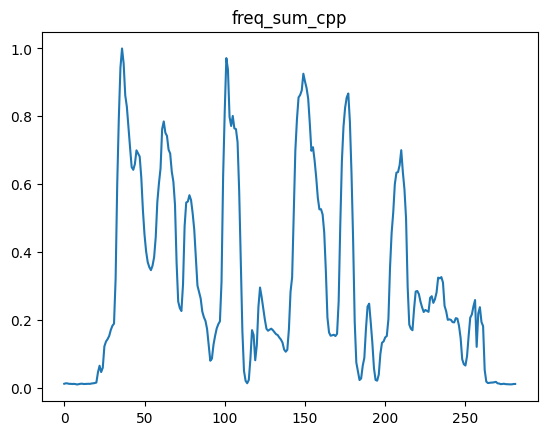

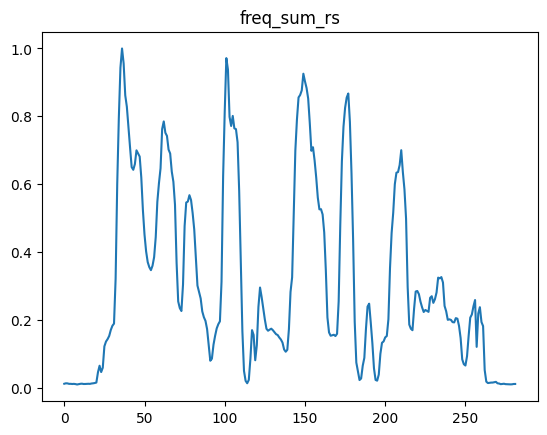

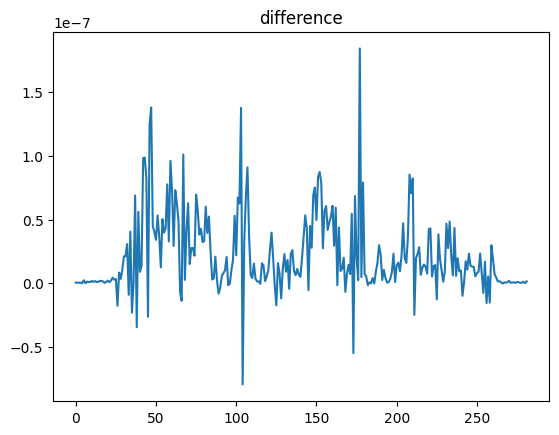

In [89]:
freq_sum_cpp =  np.sum(np.abs(cpp_stft),axis=0)
freq_sum_rs = np.sum(np.abs(rs_stft),axis=0)

# normalization for scale
freq_sum_cpp = freq_sum_cpp/np.max(freq_sum_cpp)
freq_sum_rs = freq_sum_rs/np.max(freq_sum_rs)

plt.figure()
plt.plot(freq_sum_cpp)
plt.title("freq_sum_cpp")

plt.figure()
plt.plot(freq_sum_rs)
plt.title("freq_sum_rs")


diff = freq_sum_cpp - freq_sum_rs
print(diff.shape)



plt.figure()
plt.plot(diff)
plt.title("difference")

## n_fft = 512, hop = 256, center = True 

In [24]:
input_wav = rs.load("../data/male_1.wav",sr=16000)[0]
cpp_stft = np.fromfile("../data/male_1_stft.bin", dtype=np.float64)
print(cpp_stft.shape)
cpp_stft = cpp_stft.reshape((int(len(cpp_stft)/514), 514))
# r,i,r,i  to cplx cplx
cpp_stft = cpp_stft[:,0::2] + cpp_stft[:,1::2]*1j
cpp_stft = cpp_stft.T
cpp_stft = cpp_stft[:,1:-1]
print(cpp_stft.shape)

rs_stft = rs.stft(input_wav, n_fft=512, hop_length=256, win_length=512, window='hann', center=True, pad_mode="reflect")
rs_stft = rs_stft[:,1:-1]
print(rs_stft.shape)


(74530,)
(257, 143)
(257, 143)


(143,)


Text(0.5, 1.0, 'difference')

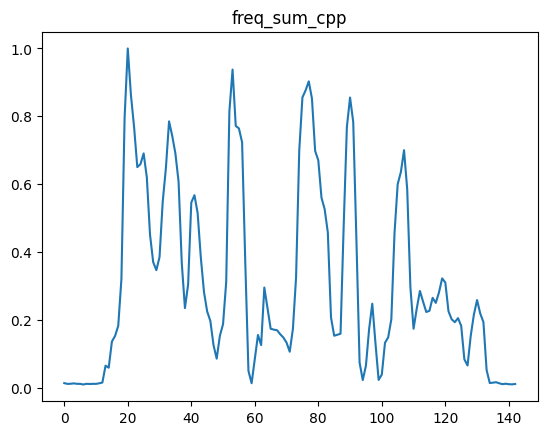

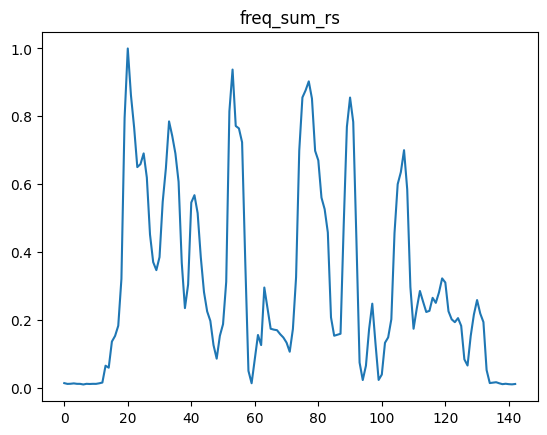

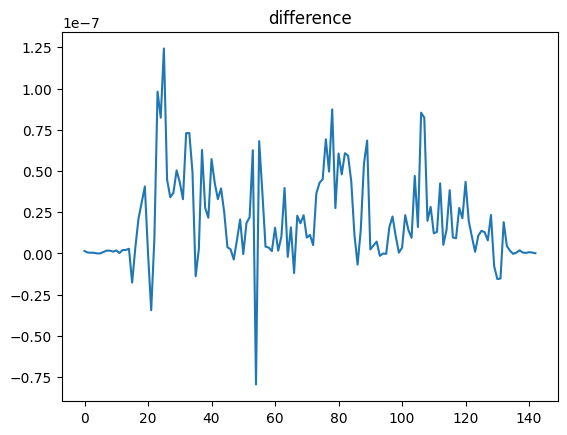

In [25]:
freq_sum_cpp =  np.sum(np.abs(cpp_stft),axis=0)
freq_sum_rs = np.sum(np.abs(rs_stft),axis=0)

# normalization for scale
freq_sum_cpp = freq_sum_cpp/np.max(freq_sum_cpp)
freq_sum_rs = freq_sum_rs/np.max(freq_sum_rs)

plt.figure()
plt.plot(freq_sum_cpp)
plt.title("freq_sum_cpp")

plt.figure()
plt.plot(freq_sum_rs)
plt.title("freq_sum_rs")


diff = freq_sum_cpp - freq_sum_rs
print(diff.shape)



plt.figure()
plt.plot(diff)
plt.title("difference")